# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_4DVARQG.py'

In [2]:
import sys
sys.path.append('..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_4DVARQG_5
saveoutputs: True
name_exp_save: 2020a_4DVARQG_5
path_save: ../outputs/2020a_4DVARQG/2020a_4DVARQG_5
tmp_DA_path: ../scratch/2020a_4DVARQG/2020a_4DVARQG_5
init_date: 2012-10-01 00:00:00
final_date: 2012-12-04 00:00:00
assimilation_time_step: 6:00:00
saveoutput_time_step: 6:00:00
flag_plot: 0
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None



cp: '../scratch/2020a_4DVARQG/2020a_4DVARQG_5/config.py' and '../scratch/2020a_4DVARQG/2020a_4DVARQG_5/config.py' are the same file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_CAR
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dx: 10.0
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_JAX
name_var: {'SSH': 'ssh'}
name_init_var: {}
dir_model: None
multiscale: False
dtmodel: 600
time_scheme: rk2
upwind: 3
upwind_adj: None
Reynolds: False
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81

Tangent test:
1E+00 1E+00
1E-01 1E+00
1E-02 9E-01
1E-03 3E-01
1E-04 3E-02
1E-05 7E-03
1E-06 3E-04
1E-07 3E-05
1E-08 2E-06
1E-09 9E-07
Adjoint test:
1.0000000000000016


In [ ]:
from src import bc as bc
Bc = bc.Bc(config)

## Observations

In [ ]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

In [ ]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

## Reduced Basis

In [ ]:
from src import basis as basis
Basis = basis.Basis(config,State)

## Assimilation

In [ ]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

## Diagnostics

In [6]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: None
time_min: 2012-10-22 00:00:00
time_max: 2012-12-02 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: ../../data/2020a_SSH_mapping_NATL60/dc_ref/NATL60-CJM165_GULFSTREAM*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: sossheig
options_ref: {'combine': 'nested', 'concat_dim': 'time', 'parallel': True}
name_exp_var: ssh



In [7]:
Diag.regrid_exp()

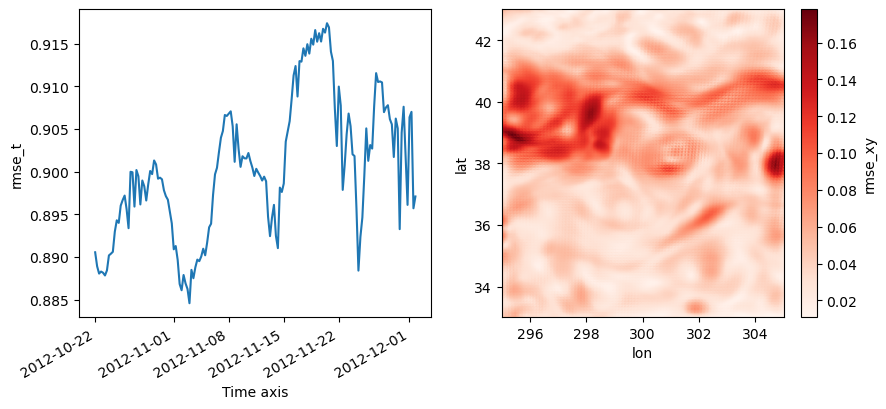

In [8]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/env-plot/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/env-plot/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


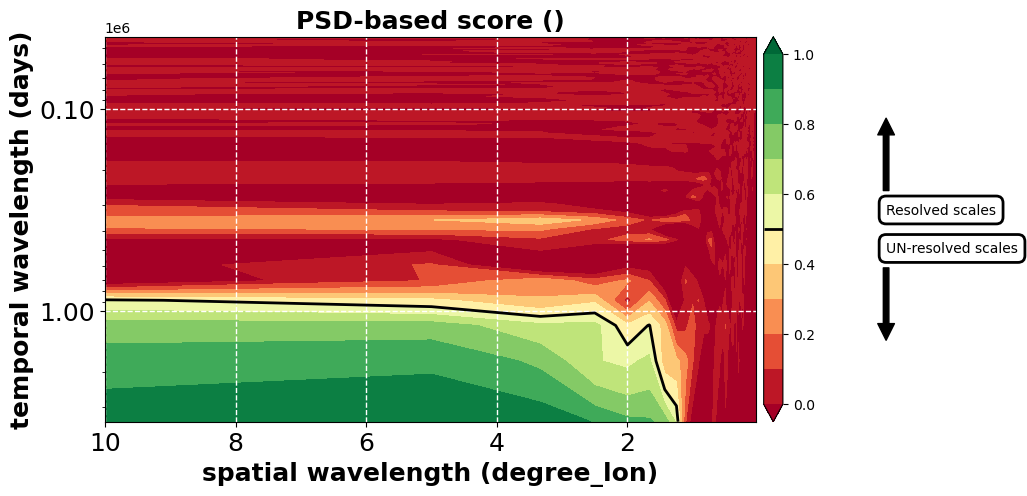

In [9]:
Diag.psd_based_scores(plot=True)

In [10]:
Diag.movie(framerate=12)

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/fleguillou/anaconda3/envs/env-plot --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

In [11]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [12]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2020a_4DVARQG_5,0.9,0.01,1.23,10.2
